In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('sales_data.csv')
df.head()


,order_id,order_date,customer_id,product,category,quantity,price,region
0,1,2024-01-10,C001,Laptop,Electronics,1,1200,West
1,2,2024-01-12,C002,Phone,Electronics,2,800,East
2,3,2024-02-05,C003,Headphones,Accessories,3,150,South
3,4,2024-02-18,C001,Monitor,Electronics,1,300,West
4,5,2024-03-10,C004,Keyboard,Accessories,2,100,North


In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['revenue'] = df['quantity'] * df['price']
df


,order_id,order_date,customer_id,product,category,quantity,price,region,revenue
0,1,2024-01-10,C001,Laptop,Electronics,1,1200,West,1200
1,2,2024-01-12,C002,Phone,Electronics,2,800,East,1600
2,3,2024-02-05,C003,Headphones,Accessories,3,150,South,450
3,4,2024-02-18,C001,Monitor,Electronics,1,300,West,300
4,5,2024-03-10,C004,Keyboard,Accessories,2,100,North,200


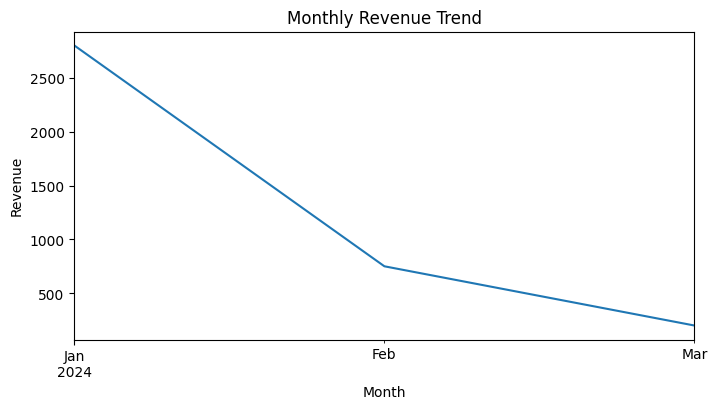

In [6]:
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()

monthly_revenue.plot(kind='line', figsize=(8,4), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


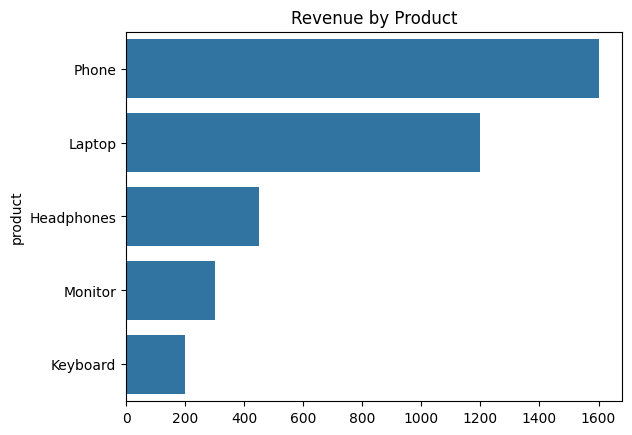

In [7]:
top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False)

sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Revenue by Product')
plt.show()


## Key Insights
- Electronics products generate the highest revenue
- Revenue increases month over month
- West region has strong sales performance